### Realizar las instalaciones e importaciones necesarias para trabajar desde google Colab

#### Instalacion e importacion para cargar archivos en google colab

In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# x_std_test.npy
x_std_test_URL = '1V3vBoOhp7iqyFsx_8NfD1RzLdBJYT4Tp'
# x_train.npy
x_train_URL = '1MTLFtAx7QUIABDm7xnnvZYUa_08fW5Pc'
# y_std_test.npy
y_std_test_URL = '1fvBfhiGgPZjEszMYV0KRu4q0-NZcAE-o'
# y_train.npy
y_train_URL = '1u6zlIaf4eAWD71zBBD9FcOolkJpNoGgr'

In [5]:
# x_std_test.npy
x_std_test_file = drive.CreateFile({'id':x_std_test_URL})
x_std_test_file.GetContentFile('x_std_test.npy')
# x_train.npy
x_train_file = drive.CreateFile({'id':x_train_URL})
x_train_file.GetContentFile('x_train.npy')
# y_std_test.npy
y_std_test_file = drive.CreateFile({'id':y_std_test_URL})
y_std_test_file.GetContentFile('y_std_test.npy')
# y_train.npy
y_train_file = drive.CreateFile({'id':y_train_URL})
y_train_file.GetContentFile('y_train.npy')

In [7]:
!ls

adc.json  sample_data  x_std_test.npy  x_train.npy  y_std_test.npy  y_train.npy


#### Instalacion e importacion de paquetes necesarios

In [8]:
!pip install numpy
!pip install matplotlib

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#### definicion de funciones necesarias

In [10]:
def load_data():
    train_set_x_orig = np.load("x_train.npy") # train set features
    train_set_y_orig = np.load("y_train.npy") # train set labels

    test_set_x_orig = np.load("x_std_test.npy") # test set features
    test_set_y_orig = np.load("y_std_test.npy") # test set labels
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [11]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [12]:
def compute_cost(AL, Y):
    """
    Implement the cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    # Compute loss from aL and y.
    cost = -np.mean(Y * np.log(AL + 1e-08))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [13]:
def softmax(Z):
    """
    Implements the softmax activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of softmax(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = np.exp(Z-np.max(Z)) / np.exp(Z-np.max(Z)).sum(axis=0, keepdims=True)
    cache = Z
    
    return A, cache

In [14]:
def softmax_backward(dA, Y, cache):
    """
    Implement the backward propagation for a single softmax unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache

    dZ = dA - Y
    
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [15]:
def tanh(Z):
    """
    Implements the tanh activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of tanh(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = np.tanh(Z)
    cache = Z
    
    return A, cache

In [16]:
def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache

    dZ = 1- np.power(dA, 2)
    
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [17]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    elif activation == "tanh":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_softmax_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> softmax. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10,X.shape[1]))
            
    return AL, caches

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> softmax group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "softmax" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = AL - Y
    
    # Lth layer (softmax -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "softmax")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros(m)
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    
    p = (np.argmax(y, axis=0) == np.argmax(probas, axis = 0)) # [1,2,5,4]
    
    #print(np.count_nonzero(p)/m)
    

    #print(X.shape[1])
    #print(np.count_nonzero((p == y).all(axis=0)))
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str((np.count_nonzero(p)/m)*100))
        
    return p

In [ ]:
def predictNGraph(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros(m)
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    
    p = (np.argmax(y, axis=0) == np.argmax(probas, axis = 0))


    #print(np.count_nonzero(p))
    #print(p.size - np.count_nonzero(p))
    #print(np.count_nonzero(p) + (p.size - np.count_nonzero(p)))
    
    #print(np.count_nonzero(p)/m)
    

    #print(X.shape[1])
    #print(np.count_nonzero((p == y).all(axis=0)))
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str((np.count_nonzero(p)/m)*100))
        
    return p

# Asignacion 02

Cargar Dataset

In [ ]:
train_x_orig, train_y, test_x_orig, test_y = load_data()

In [ ]:
# Exploring the dataset 

print ("Number of training examples: " + str(train_x_orig.shape[1]))
print ("Number of testing examples: " + str(test_x_orig.shape[1]))
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 60000
Number of testing examples: 5000
train_x_orig shape: (784, 60000)
train_y shape: (10, 60000)
test_x_orig shape: (784, 5000)
test_y shape: (10, 5000)


Red de L capas

In [ ]:
# params
json_params = { "dnn_layers": list( ) }
json_params["dnn_layers"].append( { "n" : 36, "activation" : "relu", "w": [], "b":  [] } )
json_params["dnn_layers"].append( { "n" : 25, "activation" : "sigmoid", "w": [], "b":  [] } )
json_params["dnn_layers"].append( { "n" : 20, "activation" : "relu", "w": [], "b":  [] } )
json_params["dnn_layers"].append( { "n" : 10, "activation" : "softmax", "w": [], "b":  [] } )

layer_dims = [n["n"] for n in json_params["dnn_layers"]]
layer_dims.insert(0, train_x_orig.shape[0])

print(layer_dims)


[784, 36, 25, 20, 10]


In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.10, num_iterations = 3000, print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network:.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. 
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        # Forward propagation: 
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.232783
Cost after iteration 100: 0.080625
Cost after iteration 200: 0.063065
Cost after iteration 300: 0.064822
Cost after iteration 400: 0.053761
Cost after iteration 500: 0.048731
Cost after iteration 600: 0.046925
Cost after iteration 700: 0.045429
Cost after iteration 800: 0.043151
Cost after iteration 900: 0.042901
Cost after iteration 1000: 0.041152
Cost after iteration 1100: 0.043504
Cost after iteration 1200: 0.039356
Cost after iteration 1300: 0.040374
Cost after iteration 1400: 0.039170
Cost after iteration 1500: 0.037863
Cost after iteration 1600: 0.037318
Cost after iteration 1700: 0.036305
Cost after iteration 1800: 0.035473
Cost after iteration 1900: 0.035877
Cost after iteration 2000: 0.035229
Cost after iteration 2100: 0.033767
Cost after iteration 2200: 0.034912
Cost after iteration 2300: 0.033330
Cost after iteration 2400: 0.032657
Cost after iteration 2500: 0.034791
Cost after iteration 2600: 0.031807
Cost after iteration 2700: 0.031720
Cost

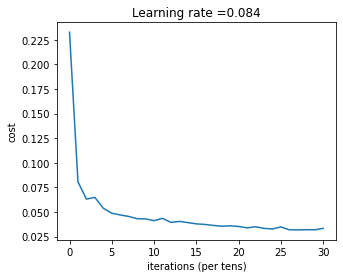

In [ ]:
parameters = L_layer_model(train_x_orig, train_y, layer_dims, learning_rate = 0.10, num_iterations = 3000, print_cost = True)

In [ ]:
predictions_train = predict(train_x_orig, train_y, parameters)

Accuracy: 88.46000000000001


In [ ]:
predictions_train = predict(test_x_orig, test_y, parameters)

Accuracy: 85.98


In [ ]:
json_params["dnn_layers"][0]["w"] = parameters["W1"]
json_params["dnn_layers"][0]["b"] = parameters["b1"].reshape(-1)

json_params["dnn_layers"][1]["w"] = parameters["W2"]
json_params["dnn_layers"][1]["b"] = parameters["b2"].reshape(-1)

json_params["dnn_layers"][2]["w"] = parameters["W3"]
json_params["dnn_layers"][2]["b"] = parameters["b3"].reshape(-1)

json_params["dnn_layers"][3]["w"] = parameters["W4"]
json_params["dnn_layers"][3]["b"] = parameters["b4"].reshape(-1)

In [ ]:
print(json_params)

{'dnn_layers': [{'n': 36, 'activation': 'relu', 'w': array([[ 5.80126694e-02, -2.21806872e-02, -1.97136502e-02, ...,
        -5.06980754e-02, -1.63399198e-02,  1.76500761e-02],
       [ 4.36426198e-02, -6.91788538e-02, -2.89454747e-02, ...,
         5.18814391e-03, -5.22052131e-02,  2.18275110e-02],
       [ 1.07080443e-02, -6.63107368e-02, -7.68347809e-02, ...,
        -7.03952449e-02,  5.40979960e-03, -5.99533364e-05],
       ...,
       [ 3.04155520e-03,  5.23897321e-02, -3.37629764e-02, ...,
         1.52698017e-02, -4.80127057e-02, -1.06241486e-02],
       [ 5.35330369e-03,  2.28030398e-03,  5.17474480e-02, ...,
        -4.17855093e-02,  2.11172085e-02,  3.40149064e-02],
       [-3.64918264e-03,  6.16338329e-04,  2.58080720e-02, ...,
         1.47453549e-02,  9.09278519e-03,  4.75807322e-02]]), 'b': array([-0.04813559,  0.22787325,  0.02856732,  0.21034846,  0.03820926,
        0.300445  ,  0.18965163, -0.01576979, -0.05183704, -0.00836822,
        0.03486291, -0.08836164, -0.1440

In [ ]:
import json
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [ ]:
json.dumps(json_params, cls=NumpyEncoder)

'{"dnn_layers": [{"n": 36, "activation": "relu", "w": [[0.05801266944089844, -0.0221806872018354, -0.019713650178193824, -0.036836267706165673, 0.03162504045032643, -0.07485250228063592, 0.05393859299740525, -0.04153027788219651, 0.0199553881534535, 0.018582821610773615, 0.011858372801271267, -0.22987432078993264, -0.03515358186307442, -0.040678017521809516, 0.027388304272042696, -0.016451655837130767, -0.15280414754053304, -0.18473295802291467, 0.005003877920042995, -0.006444748317866289, -0.06638530415367393, 0.03680779654419131, 0.05095109900245581, 0.03600250439097379, 0.03855541917923325, -0.02003517274711942, -0.0024525001012834988, -0.034392214371518896, -0.00974552933394181, 0.019043319053732837, -0.024807416662531803, -0.010376342283014145, -0.0009346547156858408, 0.009266793493658602, 0.08155544397502273, 0.179105105269821, 0.1003971850302454, -0.047460701973250904, -0.09941623685525883, -0.03515088674929297, 0.0690919303436709, -0.09121191793342841, -0.14298845484470357, 0.0

In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('params.json', 'w') as f:
  f.write(json.dumps(json_params, cls=NumpyEncoder))

In [ ]:
from google.colab import files
files.download('params.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
exported = json.loads(uploaded["nosoftmax.json"].decode("utf-8"))

In [ ]:
json.dumps(exported, cls=NumpyEncoder)

'{"hidden-layers": [{"n": 40, "activation": "relu", "w": [[0.05796670110637324, -0.02184716805265667, -0.018851410818023717, -0.03689367915489757, 0.031086230334121317, -0.09352495606187043, 0.03947298026085671, -0.03867471800759007, 0.041014926771391354, 0.019307047489684558, 0.09782120589212635, -0.007096617463877623, -0.003540769612590942, 0.04538621138607316, 0.132392075415734, -0.011840958983264378, 0.030052888734571133, 0.0021116574467214813, 0.054976151083312684, 0.10503132317489666, -0.00048347594226858567, 0.029835611471323645, 0.02962071640986957, 0.02123668146440918, 0.0340123264741192, -0.02375536790058816, -0.003920945331850764, -0.03384726613996403, -0.00957012180288971, 0.01920841289515526, -0.02402712583768021, -0.012397676924738893, -0.0314591460013976, -0.052272778547470464, -0.07573978307729741, -0.001478304042391926, -0.06946402144176969, -0.07102064678878604, 0.07982672428873329, 0.0849078130110488, 0.0005058250995986622, -0.019410954114572224, -0.01648881469017315

In [ ]:
!ls

 adc.json	        params.json   x_std_test.npy   y_std_test.npy
'params(86.48%).json'   sample_data   x_train.npy      y_train.npy
/bin/bash: nano: command not found


In [ ]:
par = dict()
#par["hidden-layers"] = []
for idx, l in enumerate(exported["hidden-layers"]):
  #par["hidden-layers"].append({"n": l["n"], "activation" : l["activation"], "w": np.array(l["w"]), "b": np.array(l["b"])})
  par["W"+str(idx+1)] = np.array(l["w"])
  par["b"+str(idx+1)] = np.array(l["b"])
  #par["hidden-layers"]["w"] = np.array(l["w"])
  #par["hidden-layers"]["b"] = np.array(l["b"])


In [ ]:
t = predict(test_x_orig, test_y, par)

AssertionError: ignored

In [ ]:
t = predictNGraph(test_x_orig, test_y, par)
t

Accuracy: 86.48


array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
import numpy as np

In [ ]:
np.array([[1],[2],[3],[4],[5],[6],[7],[8]]).reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8])